<a href="https://colab.research.google.com/github/Julius-717/NSE_SAFCOM_StockPrice/blob/main/NSE_StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [10]:
from google.colab import files
uploaded = files.upload()

Saving NSE_SCOM_Safaricom.csv to NSE_SCOM_Safaricom.csv


In [11]:
train = pd.read_csv('NSE_SCOM_Safaricom.csv', index_col="Date", parse_dates=True)

In [54]:
train.head()

,Open,High,Low,Close,Vol.,Change %,Close: 30 Day Mean
Date,,,,,,,
2012-11-06,3.40,3.45,3.35,3.40,3.24M,0.00%,NaN
2012-12-06,3.40,3.50,3.40,3.45,6.09M,1.47%,NaN
2012-06-13,3.45,3.45,3.35,3.40,7.29M,-1.45%,NaN
2012-06-14,3.40,3.45,3.35,3.40,31.81M,0.00%,NaN
2012-06-15,3.40,3.50,3.40,3.40,7.57M,0.00%,NaN


In [13]:
train.isna().any()

Open        False
High        False
Low         False
Close       False
Vol.        False
Change %    False
dtype: bool

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1753 entries, 2012-11-06 to 2019-06-14
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      1753 non-null   float64
 1   High      1753 non-null   float64
 2   Low       1753 non-null   float64
 3   Close     1753 non-null   float64
 4   Vol.      1753 non-null   object 
 5   Change %  1753 non-null   object 
dtypes: float64(4), object(2)
memory usage: 95.9+ KB


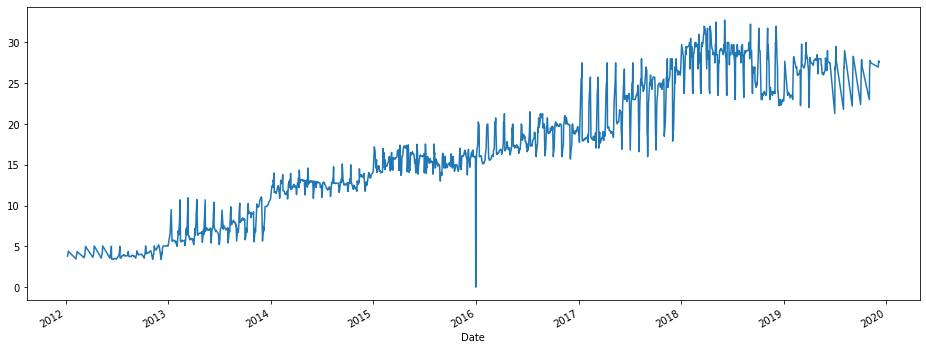

In [15]:
train['Open'].plot(figsize=(16,6))

In [27]:
# 7 day rolling mean
train.rolling(7).mean().head(20)

,Open,High,Low,Close
Date,,,,
2012-11-06,NaN,NaN,NaN,NaN
2012-12-06,NaN,NaN,NaN,NaN
2012-06-13,NaN,NaN,NaN,NaN
2012-06-14,NaN,NaN,NaN,NaN
2012-06-15,NaN,NaN,NaN,NaN
2012-06-18,NaN,NaN,NaN,NaN
2012-06-19,3.414286,3.471429,3.378571,3.421429
2012-06-20,3.421429,3.485714,3.392857,3.435714
2012-06-21,3.435714,3.492857,3.407143,3.442857


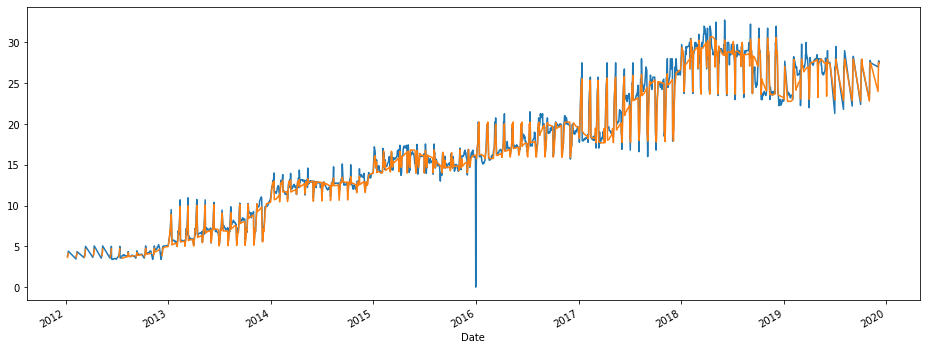

In [28]:
train['Open'].plot(figsize=(16,6))
train.rolling(window=30).mean()['Close'].plot()

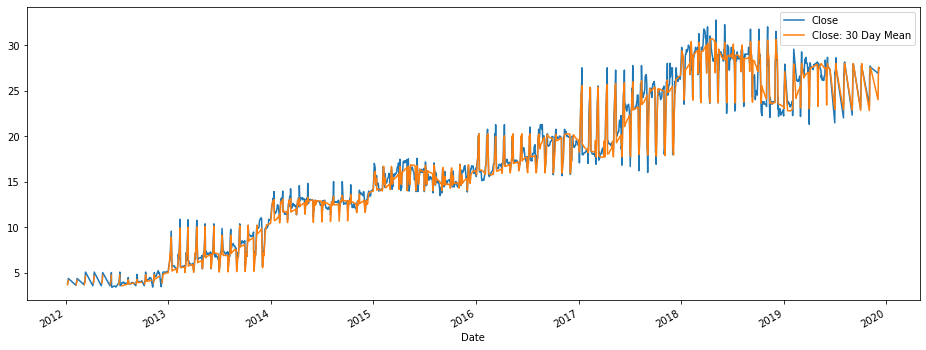

In [29]:
train['Close: 30 Day Mean'] = train['Close'].rolling(window=30).mean()
train[['Close', 'Close: 30 Day Mean']].plot(figsize=(16,6))

In [30]:
training_set = train['Open']
training_set = pd.DataFrame(training_set)

In [32]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [34]:
# creating a datastructure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [37]:
# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [38]:
# Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [39]:
# Initialising the RNN
regressor = Sequential()

In [40]:
# Adding the first LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0))

# Adding the second LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

In [42]:
# compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# fitting the RNN to the training_set
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0195
Epoch 2/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0037
Epoch 3/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0027
Epoch 4/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0026
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0023
Epoch 6/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0024
Epoch 7/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0020
Epoch 8/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0019
Epoch 9/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0019
Epoch 10/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0021
Epoch 11/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0020
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0017
Epoch 13/100


In [43]:
# Getting the real stock price of 2019
train_test = pd.read_csv("NSE_SCOM_Safaricom.csv", parse_dates=True)

In [44]:
real_stock_price = train_test.iloc[:, 1:2].values

In [55]:
train_test.head()

,Date,Open,High,Low,Close,Vol.,Change %
0,11-06-2012,3.40,3.45,3.35,3.40,3.24M,0.00%
1,12-06-2012,3.40,3.50,3.40,3.45,6.09M,1.47%
2,13-06-2012,3.45,3.45,3.35,3.40,7.29M,-1.45%
3,14-06-2012,3.40,3.45,3.35,3.40,31.81M,0.00%
4,15-06-2012,3.40,3.50,3.40,3.40,7.57M,0.00%


In [47]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1753 non-null   object 
 1   Open      1753 non-null   float64
 2   High      1753 non-null   float64
 3   Low       1753 non-null   float64
 4   Close     1753 non-null   float64
 5   Vol.      1753 non-null   object 
 6   Change %  1753 non-null   object 
dtypes: float64(4), object(3)
memory usage: 96.0+ KB


In [48]:
test_set = train_test['Open']
test_set = pd.DataFrame(test_set)

In [49]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1753 non-null   float64
dtypes: float64(1)
memory usage: 13.8 KB


In [51]:
# Getting the predicted stock price of 2019
train_total = pd.concat((train['Open'], train_test['Open']), axis = 0)
inputs = train_total[len(train_total) - len(train_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [52]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


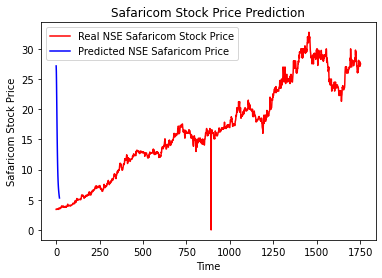

In [56]:
# visualizing the results
plt.plot(real_stock_price, color = 'red', label = 'Real NSE Safaricom Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted NSE Safaricom Price')
plt.title('Safaricom Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Safaricom Stock Price')
plt.legend()
plt.show()